In [53]:
import pandas as pd

dtype_dict = {
    'ZIP CODE': str
}

df = pd.read_csv('Motor_Vehicle_Collisions_dataset.csv', dtype=dtype_dict)

In [54]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [57]:
df.info()
print("\n")

rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149560 entries, 0 to 2149559
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [59]:
print(df.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           666125
ZIP CODE                          666390
LATITUDE                          239580
LONGITUDE                         239580
LOCATION                          239580
ON STREET NAME                    461828
CROSS STREET NAME                 819640
OFF STREET NAME                  1780105
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7321
CONTRIBUTING FACTOR VEHICLE 2     339379
CONTRIBUTING FACTOR VEHICLE 3    1994713
CONTRIBUTING FACTOR VEHICLE 4    2114334
CONTRIBUTING FACTOR VEHICLE 5    2139943
COLLISION_ID                           0
VEHICLE TYPE COD

In [61]:
columns_to_drop = [
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',    
    'CONTRIBUTING FACTOR VEHICLE 4',    
    'CONTRIBUTING FACTOR VEHICLE 5',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',             
    'VEHICLE TYPE CODE 5',
    'OFF STREET NAME'
]

df.drop(columns=columns_to_drop, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149560 entries, 0 to 2149559
Data columns (total 21 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   NUMBER OF PERSONS INJURED      float64
 10  NUMBER OF PERSONS KILLED       float64
 11  NUMBER OF PEDESTRIANS INJURED  int64  
 12  NUMBER OF PEDESTRIANS KILLED   int64  
 13  NUMBER OF CYCLIST INJURED      int64  
 14  NUMBER OF CYCLIST KILLED       int64  
 15  NUMBER OF MOTORIST INJURED     int64  
 16  NUMBER OF MOTORIST KILLED      int64  
 17  CONTRIBUTING FACTOR VEHICLE 1  object 
 18  CO

In [63]:
# Calculate the mean values
mean_persons_injured = df['NUMBER OF PERSONS INJURED'].mean()
mean_persons_killed = df['NUMBER OF PERSONS KILLED'].mean()

# Replace NaN values with the mean and reassign the columns
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].fillna(mean_persons_injured)
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(mean_persons_killed)


In [65]:
print(df.isnull().sum())

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          666125
ZIP CODE                         666390
LATITUDE                         239580
LONGITUDE                        239580
LOCATION                         239580
ON STREET NAME                   461828
CROSS STREET NAME                819640
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      7321
COLLISION_ID                          0
VEHICLE TYPE CODE 1               14962
VEHICLE TYPE CODE 2              421579
dtype: int64


In [67]:
# Replace NaN values with 'Unknown' explicitly assigning back to the DataFrame
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unknown')



In [69]:
print(df.isnull().sum())

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          666125
ZIP CODE                         666390
LATITUDE                         239580
LONGITUDE                        239580
LOCATION                         239580
ON STREET NAME                   461828
CROSS STREET NAME                819640
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1               14962
VEHICLE TYPE CODE 2              421579
dtype: int64


In [75]:
import pandas as pd

# Define replacement values
columns_to_replace = {
    'BOROUGH': 'Unknown',                        
    'LATITUDE': 'Unknown',                       
    'LONGITUDE': 'Unknown',                       
    'LOCATION': 'Unknown',
    'ZIP CODE': 'Unknown',
    'ON STREET NAME': 'Unknown',
    'CROSS STREET NAME': 'Unknown',
    'VEHICLE TYPE CODE 1': 'Unknown',              
    'VEHICLE TYPE CODE 2': 'Unknown'
}

# Replace NaN values with the specified replacements
for column, replacement in columns_to_replace.items():
    # Ensure replacement value matches the column type if necessary
    if df[column].dtype == float:  # Check for float64 columns
        replacement = float('nan') if replacement == 'Unknown' else float(replacement)
    df[column] = df[column].fillna(replacement)


In [77]:
print(df.isnull().sum())

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                         239580
LONGITUDE                        239580
LOCATION                              0
ON STREET NAME                        0
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                   0
VEHICLE TYPE CODE 2                   0
dtype: int64


In [79]:
filtered_df = df[(df['LATITUDE']!= 'Unknown') & (df['LONGITUDE']!= 'Unknown') & (df['LOCATION']!= 'Unknown')]

print("Shape before dropping:", df.shape)
print("\n")
print("Shape before dropping:", filtered_df.shape)

Shape before dropping: (2149560, 21)


Shape before dropping: (1909980, 21)


In [81]:
print(df.isnull().sum())

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                         239580
LONGITUDE                        239580
LOCATION                              0
ON STREET NAME                        0
CROSS STREET NAME                     0
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
COLLISION_ID                          0
VEHICLE TYPE CODE 1                   0
VEHICLE TYPE CODE 2                   0
dtype: int64


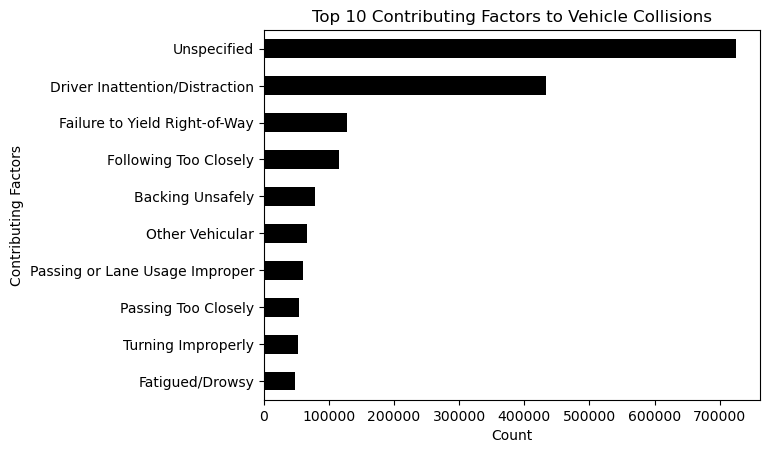

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

top_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10)
top_factors.plot(kind='barh', color='black')
plt.xlabel('Count')
plt.ylabel('Contributing Factors')
plt.title('Top 10 Contributing Factors to Vehicle Collisions')
plt.gca().invert_yaxis()
plt.show()


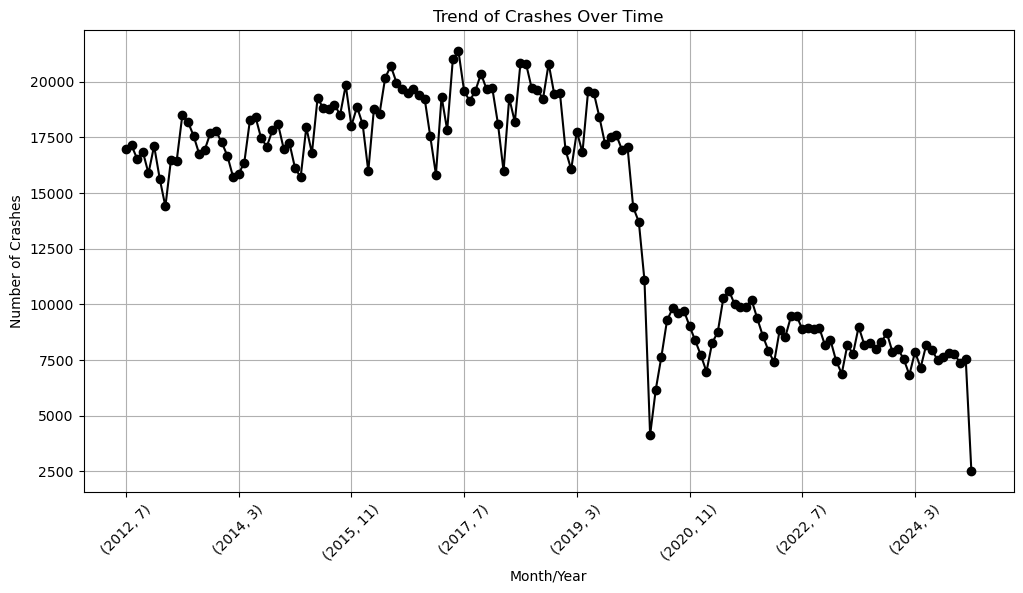

In [31]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df['Month'] = df['CRASH DATE'].dt.month
df['Year'] = df['CRASH DATE'].dt.year

crash_trend = df.groupby(['Year', 'Month']).size()
crash_trend.plot(figsize=(12,6), marker='o', color='black')
plt.xlabel('Month/Year')
plt.ylabel('Number of Crashes')
plt.title('Trend of Crashes Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

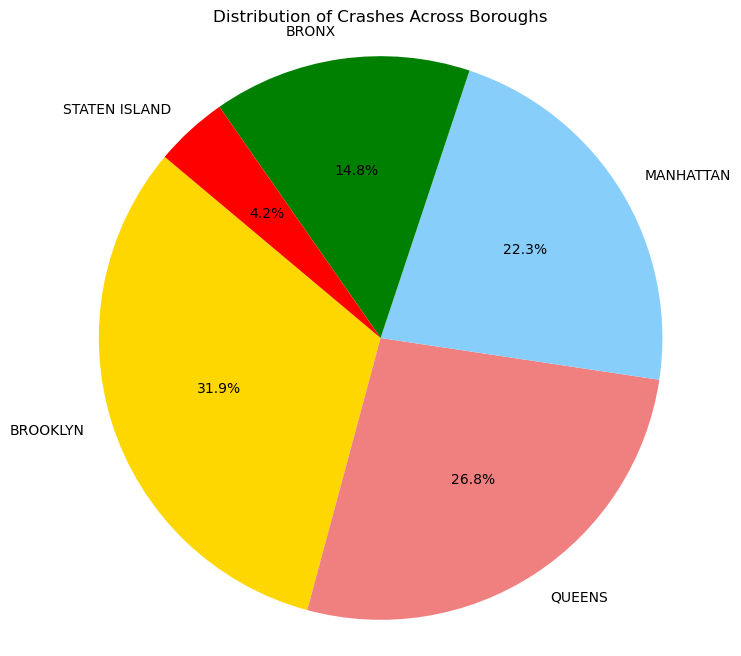

In [33]:
filtered_df = df[df['BOROUGH'] != 'Unknown']
filtered_borough_counts = filtered_df['BOROUGH'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(filtered_borough_counts, labels=filtered_borough_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'green', 'red'])
plt.axis('equal')
plt.title('Distribution of Crashes Across Boroughs')
plt.show()
        

In [35]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].replace('Unknown', 'UNKNOWN')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].replace('Unknown', 'UNKNOWN')

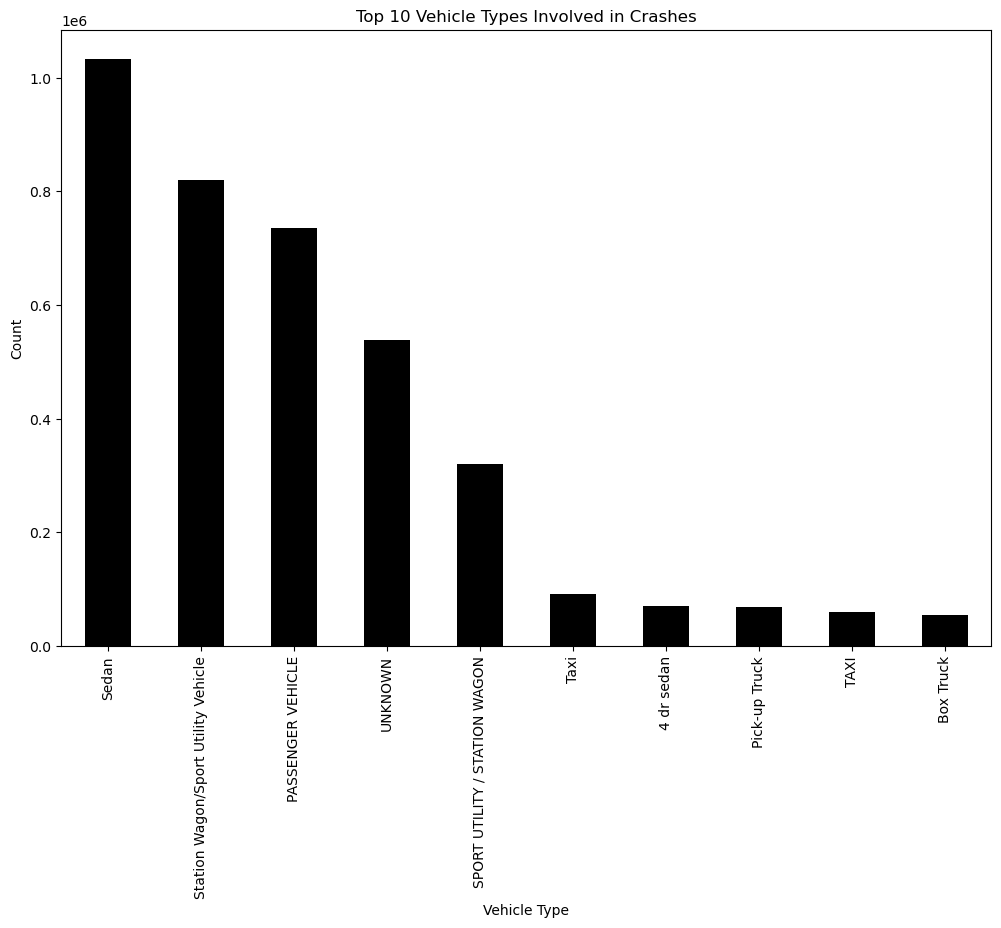

In [37]:
vehicle_counts = pd.concat([df['VEHICLE TYPE CODE 1'], df['VEHICLE TYPE CODE 2']]).value_counts().nlargest(10)

plt.figure(figsize=(12, 8))

vehicle_counts.plot(kind='bar', color='black')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Top 10 Vehicle Types Involved in Crashes')
plt.xticks(rotation=90)
plt.show()

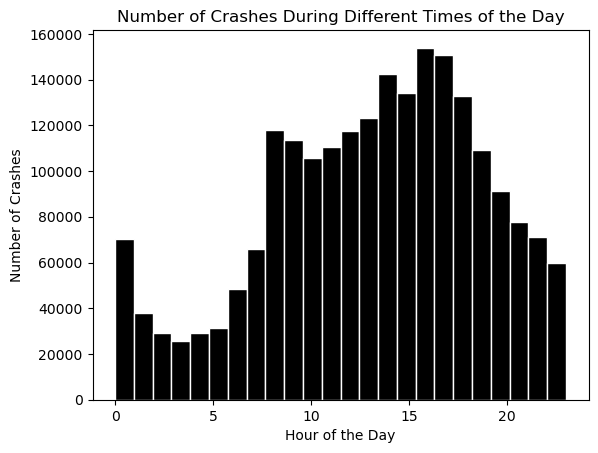

In [39]:
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M')

df['Hour'] = df['CRASH TIME'].dt.hour

plt.hist(df['Hour'], bins=24, color='black', edgecolor='white')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes During Different Times of the Day')
plt.show()

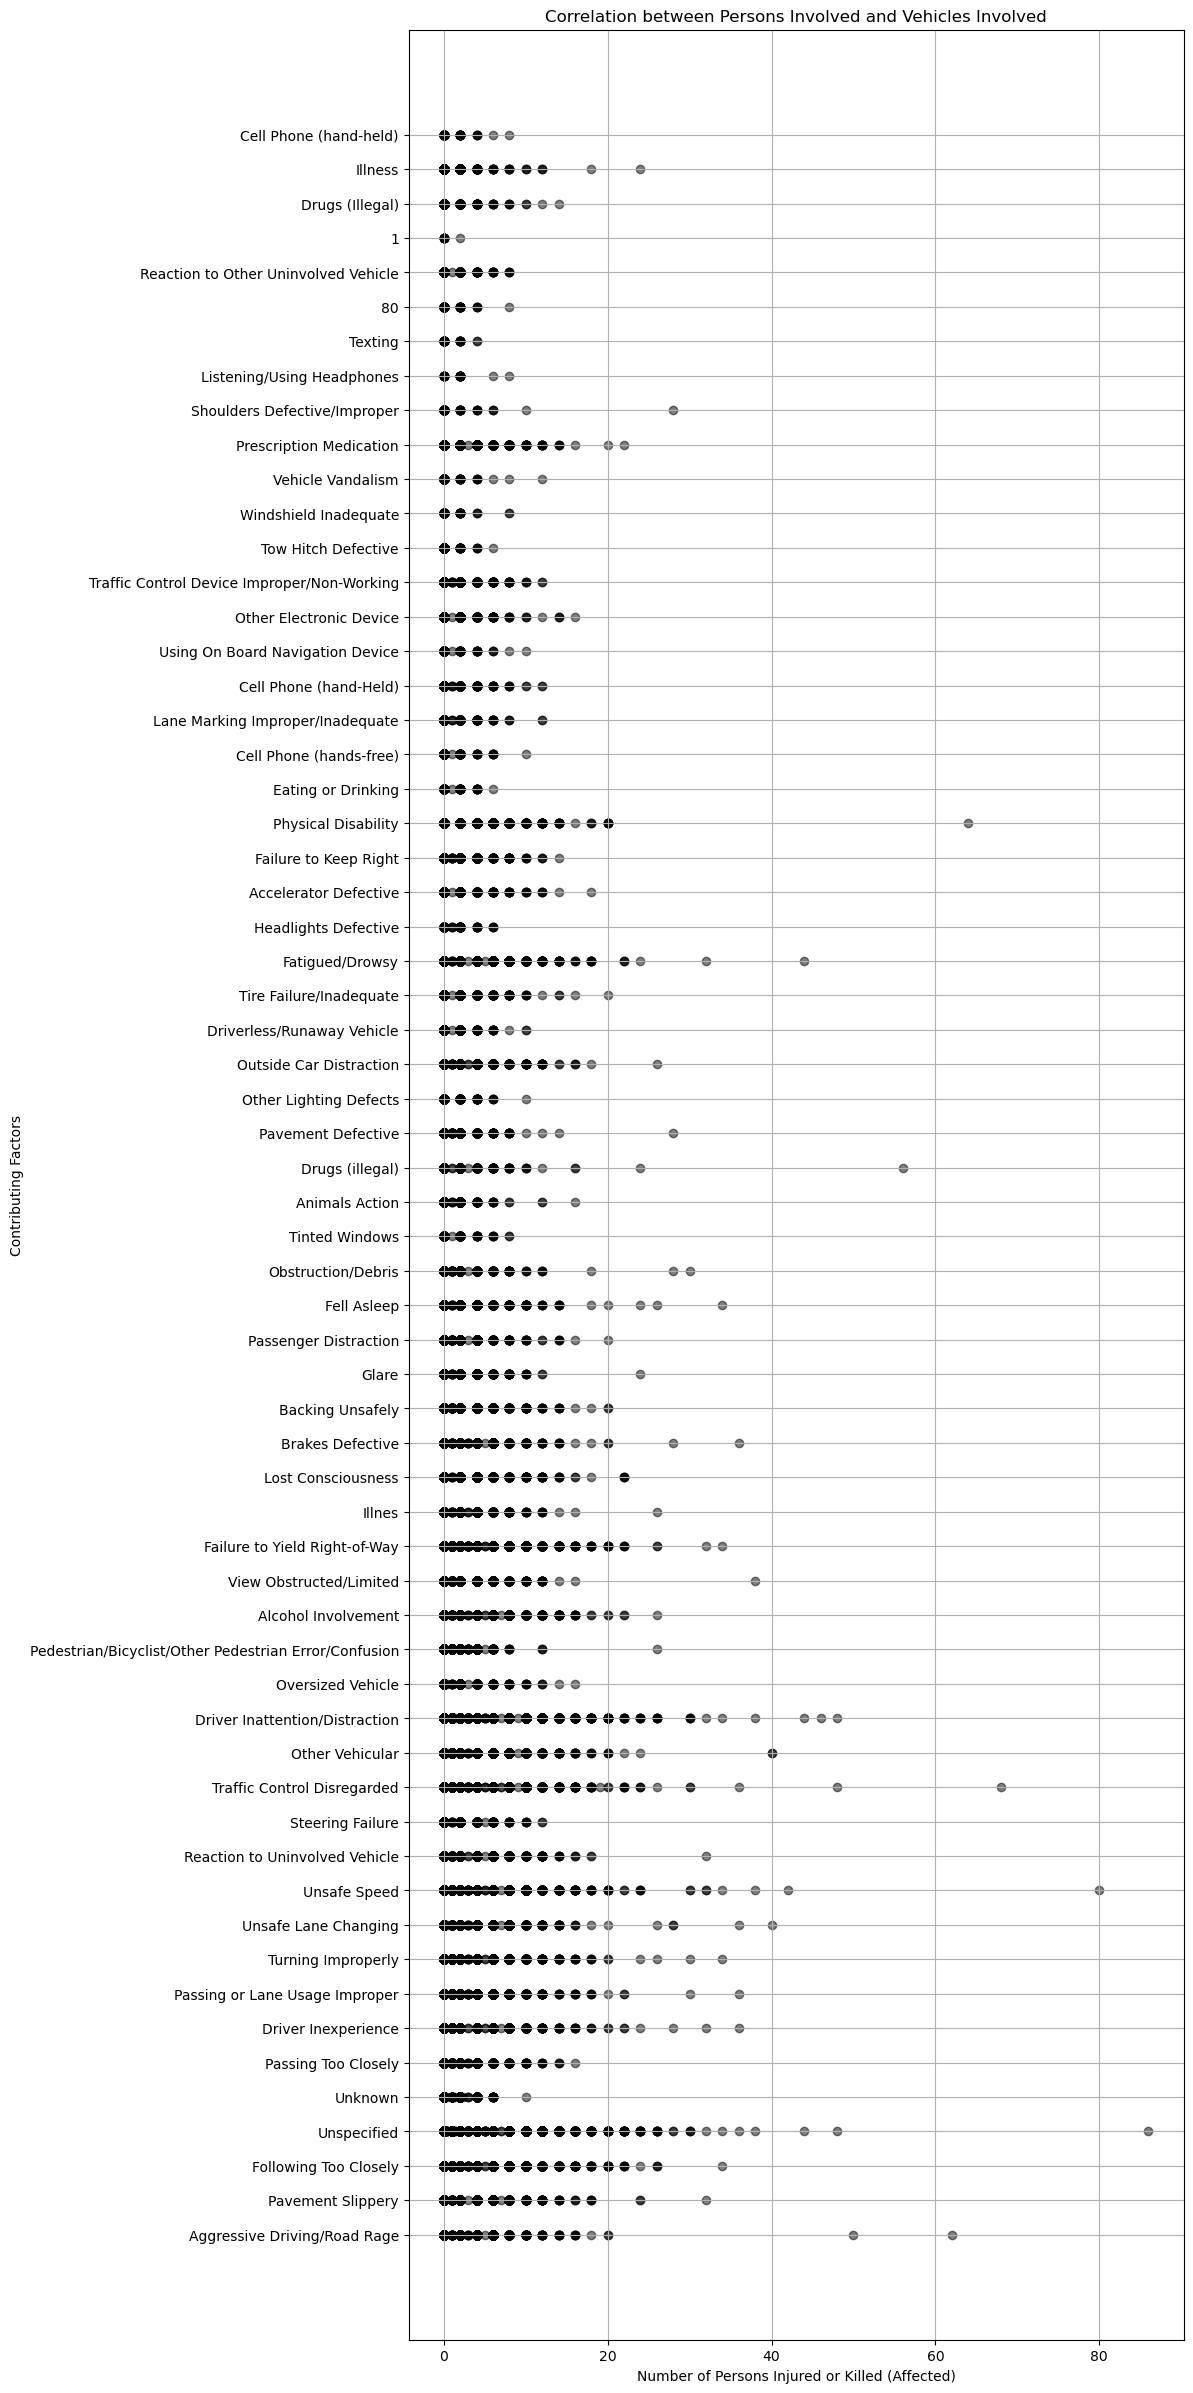

In [41]:
df['NUMBER OF PERSONS INVOLVED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED'] + df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST INJURED'] + df['NUMBER OF MOTORIST KILLED']

df['CONTRIBUTING FACTORS'] = df['CONTRIBUTING FACTOR VEHICLE 1']

plt.figure(figsize=(10, 30))

plt.scatter(df['NUMBER OF PERSONS INVOLVED'], df['CONTRIBUTING FACTORS'], alpha=0.5, color='black')
plt.xlabel('Number of Persons Injured or Killed (Affected)')
plt.ylabel('Contributing Factors')
plt.title('Correlation between Persons Involved and Vehicles Involved')
plt.grid(True)
plt.show()

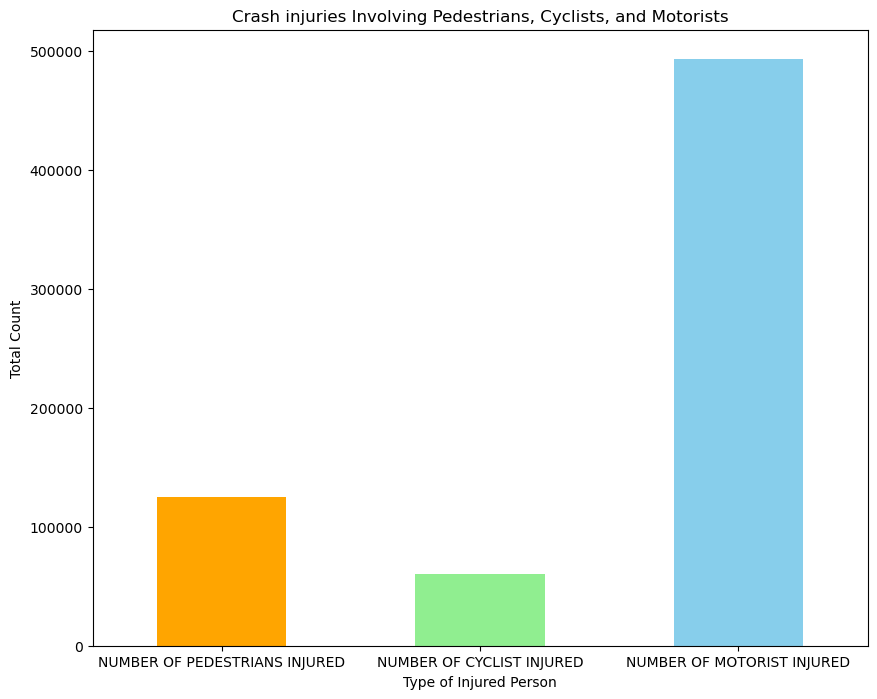

In [43]:
crash_injury_counts = df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum()

plt.figure(figsize=(10,8))
crash_injury_counts.plot(kind='bar', color=['orange', 'lightgreen', 'skyblue'])
plt.xlabel('Type of Injured Person')
plt.ylabel('Total Count')
plt.title('Crash injuries Involving Pedestrians, Cyclists, and Motorists')
plt.xticks(rotation=0)
plt.show()

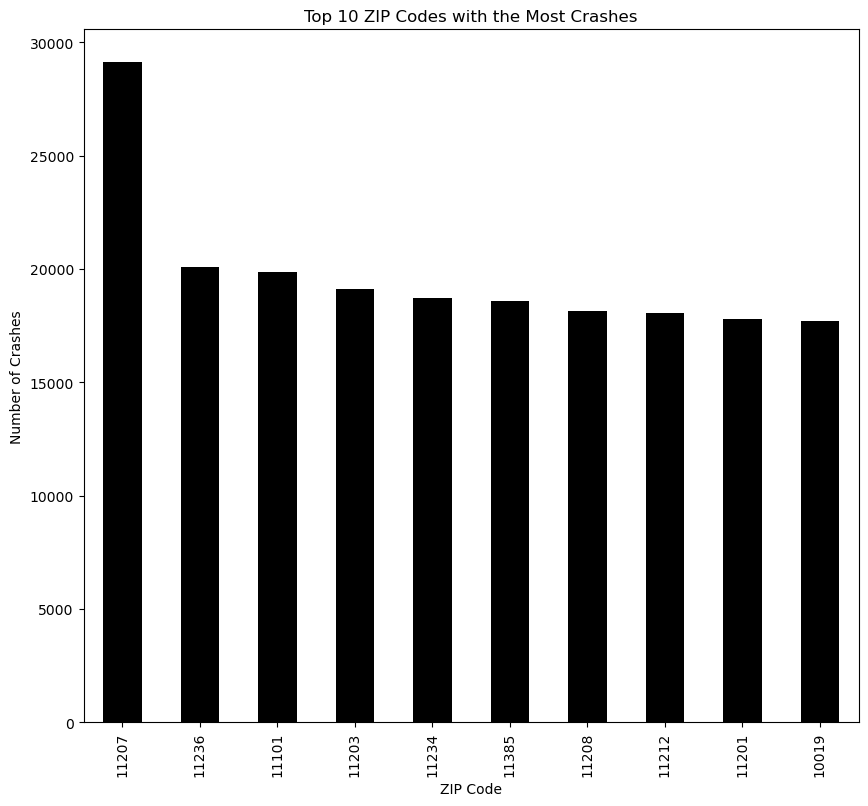

In [45]:
filtered_df = df[df['ZIP CODE'] != 'Unknown']

zip_code_counts = filtered_df['ZIP CODE'].value_counts().nlargest(10)

plt.figure(figsize=(10, 9))
zip_code_counts.plot(kind='bar', color='black')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Crashes')
plt.title('Top 10 ZIP Codes with the Most Crashes')
plt.xticks(rotation=90)
plt.show()

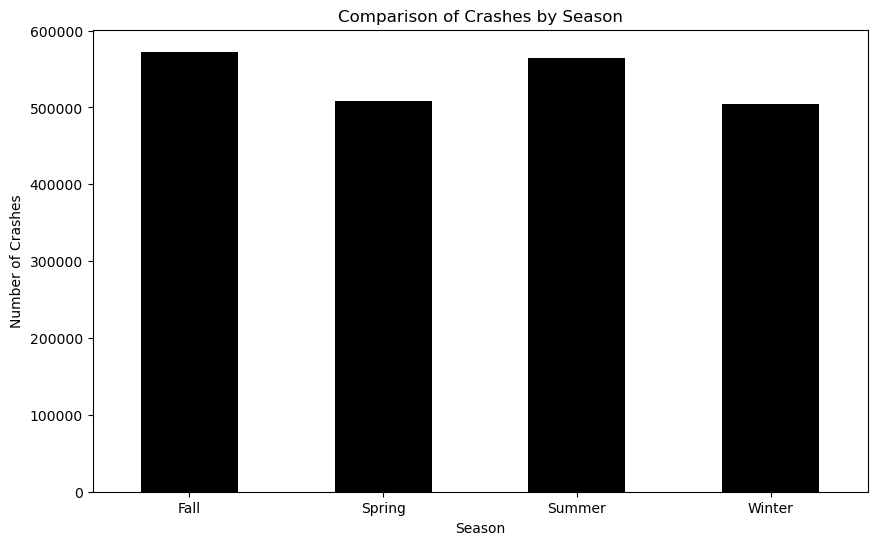

In [47]:
df['Month'] = df['CRASH DATE'].dt.month

seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
#we have sorted seasons based on data from google, may differ for different geographical locations
df['Season'] = df['Month'].map(seasons)

plt.figure(figsize=(10, 6))
df['Season'].value_counts().sort_index().plot(kind='bar', color='black')
plt.xlabel('Season')
plt.ylabel('Number of Crashes')
plt.title('Comparison of Crashes by Season')
plt.xticks(rotation=0)
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149560 entries, 0 to 2149559
Data columns (total 27 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     datetime64[ns]
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

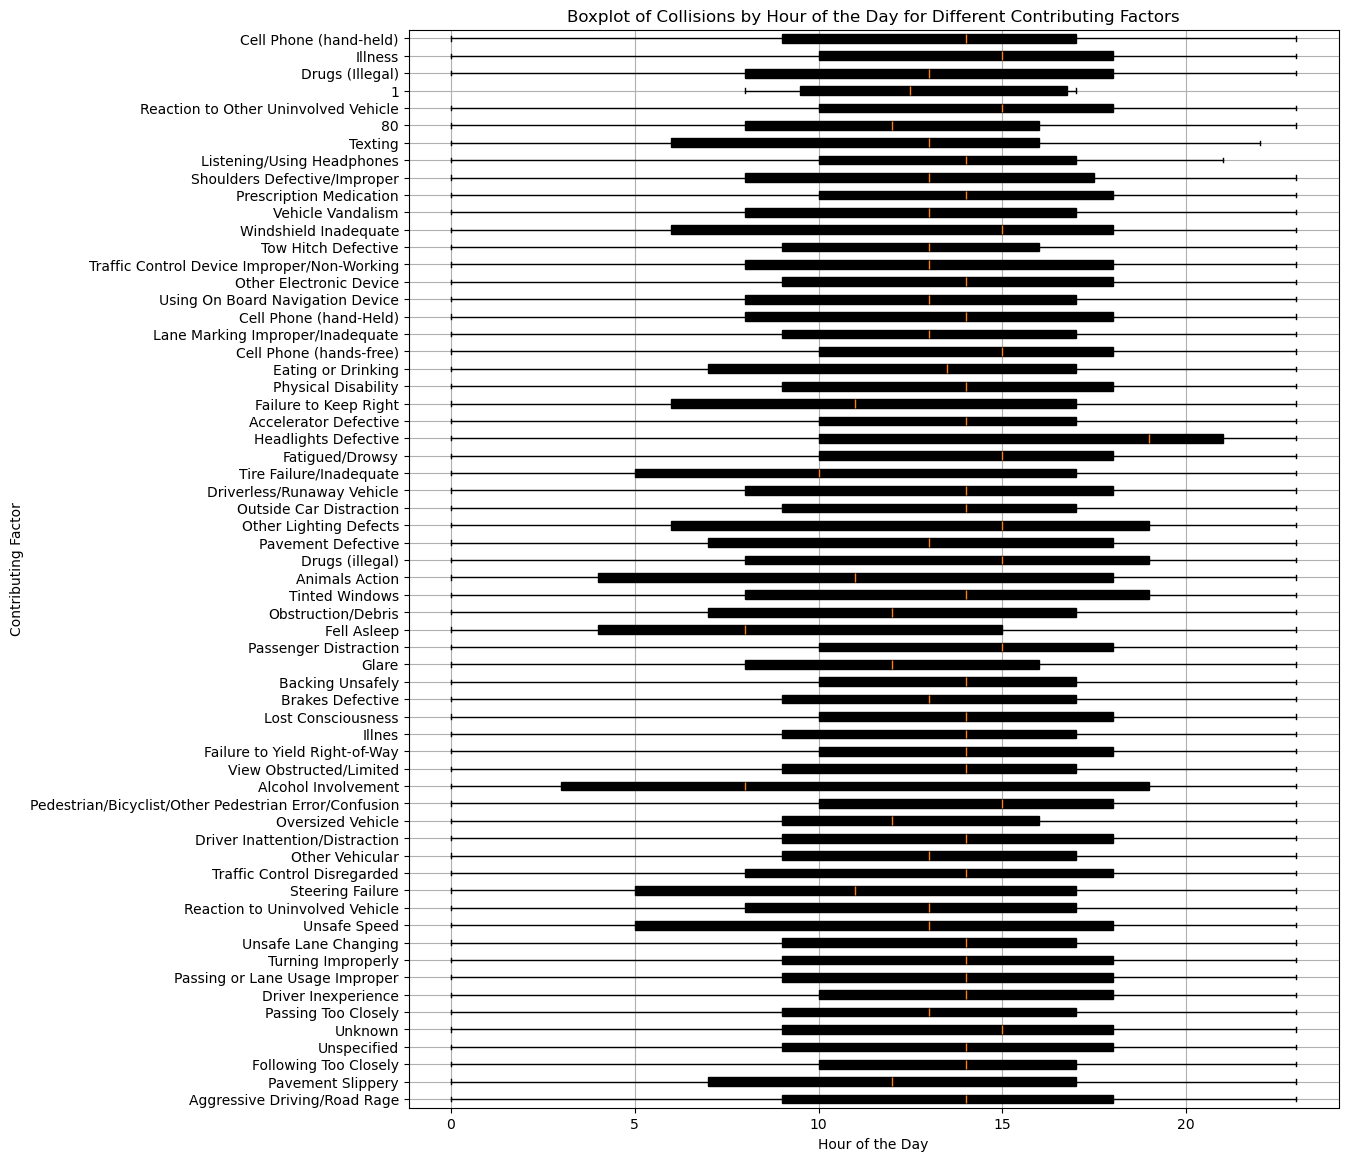

In [51]:
import matplotlib.pyplot as plt

contributing_factors = {}

for factor in df['CONTRIBUTING FACTOR VEHICLE 1'].unique():
    contributing_factors[factor] = df[df['CONTRIBUTING FACTOR VEHICLE 1'] == factor]['Hour']

data = list(contributing_factors.values())

plt.figure(figsize=(12, 14))
boxes = plt.boxplot(data, patch_artist=True, vert=False, showfliers=False)

for box in boxes['boxes']:
    box.set(facecolor='black')

plt.yticks(range(1, len(contributing_factors) + 1), contributing_factors.keys())
plt.title('Boxplot of Collisions by Hour of the Day for Different Contributing Factors')
plt.xlabel('Hour of the Day')
plt.ylabel('Contributing Factor')
plt.grid(True)
plt.show()